In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
general = pd.read_csv('test/general.csv')
prenatal = pd.read_csv('test/prenatal.csv')
sports = pd.read_csv('test/sports.csv')
# pd.set_option('display.max_columns', 8)

In [59]:
# general.set_index(0, inplace=True)
# general.reset_index(inplace=True, drop=True) # deleting an index

In [60]:
columns_name = ['', 'hospital', 'gender', 'age', 'height', 'weight', 'bmi', 'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray', 'children', 'months']
prenatal.columns = columns_name
sports.columns = columns_name

In [61]:
hospital = pd.concat([general, prenatal, sports], ignore_index = True)
# hospital.reset_index(inplace=True, drop=True) # deleting an index
hospital.drop(columns=['Unnamed: 0', ''], inplace=True)

In [62]:
hospital.sample(n=20, random_state=30)

,hospital,gender,age,height,...,mri,xray,children,months
928,sports,male,22.0,5.961,...,t,f,NaN,NaN
926,sports,male,26.0,5.804,...,t,f,NaN,NaN
901,sports,female,23.0,5.894,...,t,f,NaN,NaN
87,general,man,54.0,1.720,...,NaN,NaN,NaN,NaN
884,sports,female,20.0,6.771,...,t,f,NaN,NaN
297,general,man,56.0,1.480,...,NaN,NaN,NaN,NaN
112,general,man,77.0,1.690,...,NaN,NaN,NaN,NaN
209,general,man,29.0,2.080,...,NaN,NaN,NaN,NaN
419,general,man,53.0,1.700,...,NaN,NaN,NaN,NaN
913,sports,female,22.0,6.435,...,t,f,NaN,NaN


In [63]:
hospital.dropna(axis=0, how='all', inplace=True)

In [64]:
# hospital[['bmi', 'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray', 'children', 'months']].fillna(0, inplace=True)
hospital[['bmi', 'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray', 'children', 'months']] = hospital[['bmi', 'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray', 'children', 'months']].fillna(0)
hospital.sample(n=20, random_state=30)

,hospital,gender,age,height,...,mri,xray,children,months
929,sports,female,23.0,6.809,...,t,f,0.0,0.0
927,sports,male,21.0,6.052,...,t,f,0.0,0.0
516,prenatal,NaN,20.0,1.650,...,0,f,1.0,4.0
87,general,man,54.0,1.720,...,0,0,0.0,0.0
885,sports,female,16.0,5.915,...,t,f,0.0,0.0
463,prenatal,NaN,34.0,1.650,...,0,f,1.0,5.0
112,general,man,77.0,1.690,...,0,0,0.0,0.0
297,general,man,56.0,1.480,...,0,0,0.0,0.0
417,general,woman,26.0,1.650,...,0,0,0.0,0.0
660,prenatal,NaN,38.0,1.590,...,0,f,1.0,4.0


In [65]:
hospital['gender'] = hospital.groupby('hospital')['gender'].fillna('f')
hospital['gender'].replace(['female', 'woman'], 'f', inplace=True)
hospital['gender'].replace(['man', 'male'], 'm', inplace=True)
hospital.sample(n=20, random_state=30)

,hospital,gender,age,height,...,mri,xray,children,months
929,sports,f,23.0,6.809,...,t,f,0.0,0.0
927,sports,m,21.0,6.052,...,t,f,0.0,0.0
516,prenatal,f,20.0,1.650,...,0,f,1.0,4.0
87,general,m,54.0,1.720,...,0,0,0.0,0.0
885,sports,f,16.0,5.915,...,t,f,0.0,0.0
463,prenatal,f,34.0,1.650,...,0,f,1.0,5.0
112,general,m,77.0,1.690,...,0,0,0.0,0.0
297,general,m,56.0,1.480,...,0,0,0.0,0.0
417,general,f,26.0,1.650,...,0,0,0.0,0.0
660,prenatal,f,38.0,1.590,...,0,f,1.0,4.0


In [66]:
ans1 = hospital.hospital.mode()[0]
print(ans1)

general


In [67]:
general_stomach = hospital.loc[(hospital['hospital'] == 'general') & (hospital['diagnosis'] == 'stomach')].count()[0]
general_all = hospital.loc[hospital['hospital'] == 'general'].count()[0]
ans2 = (general_stomach / general_all).round(3)
print(ans2)

0.325


In [68]:
sport_disloc = hospital.loc[(hospital['hospital'] == 'sports') & (hospital['diagnosis'] == 'dislocation')].count()[0]
sport_all = hospital.loc[hospital['hospital'] == 'sports'].count()[0]
ans3 = (sport_disloc / sport_all).round(3)
print(ans3)

0.285


In [69]:
general_age = hospital[hospital['hospital'] == 'general']['age'].mean()
sport_age = hospital[hospital['hospital'] == 'sports']['age'].mean()
ans4 = (general_age - sport_age).round()
print(ans4)

20.0


In [70]:
ans5_1 = hospital.loc[(hospital['blood_test'] == 't') & (hospital['hospital'] == 'prenatal')].count()[0]
ans5_2 = 'prenatal'
print(ans5_1)

325


In [71]:
hospital[hospital['blood_test'] == 't'].groupby('hospital')['blood_test'].count().max()

325

In [72]:
hospital[hospital['blood_test'] == 't'].groupby('hospital')['blood_test'].count().idxmax()

'prenatal'

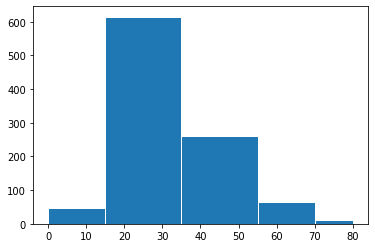

In [73]:
bins=[0, 15, 35, 55, 70, 80]
plt.hist(hospital['age'], bins=bins, edgecolor="white")
plt.show()

In [74]:
diag_label = []
count = []

data = hospital.groupby('diagnosis').agg({'diagnosis':'count'})
label = data.iloc[:, 0].tolist()
nm= data.index.names
print(nm)


['diagnosis']


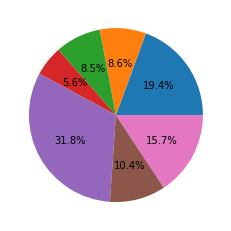

In [75]:
plt.pie(data['diagnosis'],
        autopct='%.1f%%',)
plt.show()

<AxesSubplot:ylabel='diagnosis'>

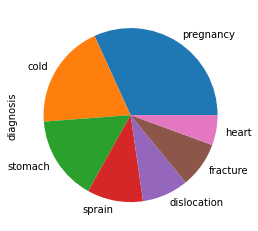

In [76]:
hospital['diagnosis'].value_counts().plot(kind='pie')

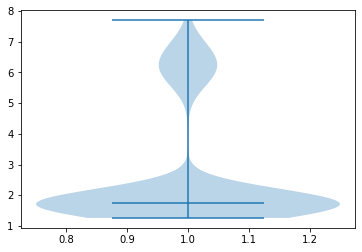

In [78]:
violin = plt.violinplot(hospital['height'], showmedians=True)
plt.show()